In [1]:
import numpy as np
import networkx as nx
import math
np.random.seed(0)

# Program to create two moon dataset

In [2]:
def semicircle1(r,n):
  return[[(math.cos(math.pi/n*x)*r) + np.random.normal(-10,10),
         (math.sin(math.pi/n*x)*r) + np.random.normal(-10,10)]
        for x in range(1,n+1)]

def semicircle2(r,n):
  return[[(math.cos(-math.pi/n*x)*r) + np.random.normal(-10,10) + 50,
         (math.sin(-math.pi/n*x)*r) + np.random.normal(-10,10) + 30]
        for x in range(1,n+1)]

In [3]:
x = []
for i in semicircle1(100,200):
  x.append(i)
for i in semicircle2(100,200):
  x.append(i)
x = np.array(x)

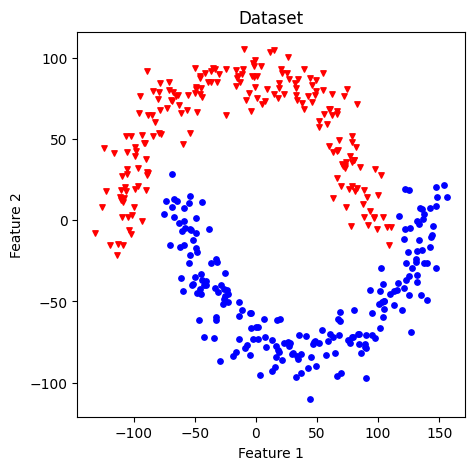

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize = (5,5))
plt.scatter(x[0:199,0], x[0:199,1], s= 15, color = 'red', marker = 'v')
plt.scatter(x[200:,0], x[200:,1], s= 15, color = 'blue', marker = 'o')
plt.title('Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Program to create two concentric circle dataset

In [5]:
np.random.seed(0)

In [6]:
def circle(r,n=100):
  return[[(math.cos(2*math.pi/n*p)*r) + np.random.normal(-10,10),
         (math.sin(2*math.pi/n*p)*r) + np.random.normal(-10,10)]
        for p in range(1,n+1)]

In [7]:
c1 = []
for i in circle(100,200):
  c1.append(i)
c1 = np.array(c1)
c2 = []
for i in circle(20,200):
  c2.append(i)
c2 = np.array(c2)

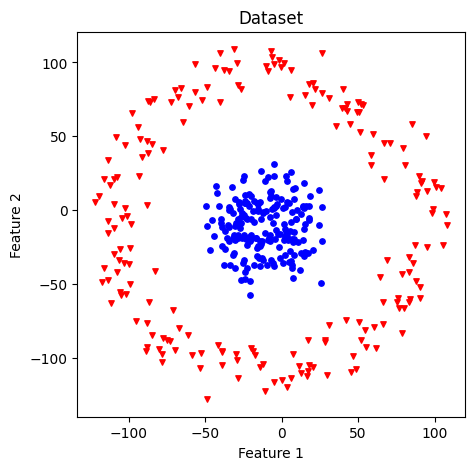

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize = (5,5))
plt.scatter(c1[0:199,0], c1[0:199,1], s= 15, color = 'red', marker = 'v')
plt.scatter(c2[0:199,0], c2[0:199,1], s= 15, color = 'blue', marker = 'o')
plt.title('Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Ceating graph for two concentric circle dataset

In [9]:
from math import sqrt

def euc_dis(r1,r2):
  distance = 0.0
  for i in range(len(r1)):
    distance+= (r1[i] - r2[i])**2
  return sqrt(distance)

In [10]:
edges =[]
m=0
for i in c1:
  dist = []
  n=0
  for j in c2:
    d = euc_dis(i,j)
    dist.append(d)
    n+=1
  edges.append([m,np.argmin(dist)+200])
  m+=1
edges


[[0, 207],
 [1, 207],
 [2, 207],
 [3, 207],
 [4, 207],
 [5, 209],
 [6, 207],
 [7, 207],
 [8, 207],
 [9, 207],
 [10, 209],
 [11, 207],
 [12, 207],
 [13, 209],
 [14, 209],
 [15, 209],
 [16, 209],
 [17, 209],
 [18, 209],
 [19, 209],
 [20, 209],
 [21, 227],
 [22, 209],
 [23, 209],
 [24, 209],
 [25, 209],
 [26, 209],
 [27, 209],
 [28, 209],
 [29, 227],
 [30, 227],
 [31, 227],
 [32, 227],
 [33, 232],
 [34, 232],
 [35, 227],
 [36, 227],
 [37, 227],
 [38, 232],
 [39, 232],
 [40, 232],
 [41, 232],
 [42, 232],
 [43, 232],
 [44, 232],
 [45, 232],
 [46, 232],
 [47, 232],
 [48, 232],
 [49, 232],
 [50, 232],
 [51, 232],
 [52, 232],
 [53, 232],
 [54, 232],
 [55, 232],
 [56, 232],
 [57, 232],
 [58, 232],
 [59, 232],
 [60, 254],
 [61, 232],
 [62, 264],
 [63, 254],
 [64, 254],
 [65, 264],
 [66, 264],
 [67, 264],
 [68, 264],
 [69, 264],
 [70, 264],
 [71, 264],
 [72, 254],
 [73, 264],
 [74, 264],
 [75, 264],
 [76, 264],
 [77, 264],
 [78, 264],
 [79, 264],
 [80, 264],
 [81, 264],
 [82, 264],
 [83, 278],
 [

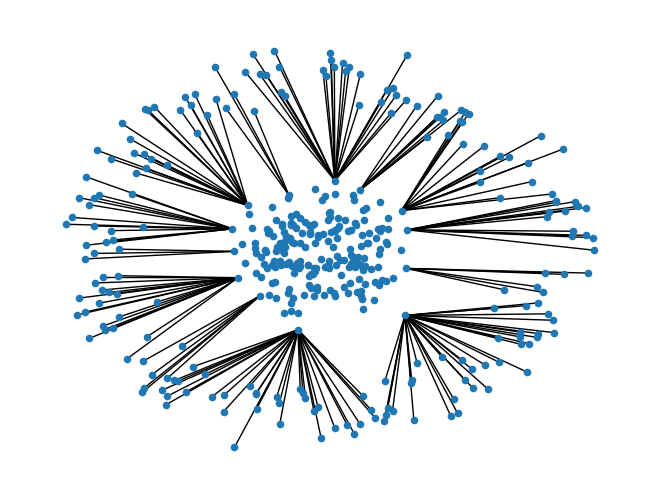

In [11]:
G = nx.Graph()
pos = {}

for i in range(len(c2)):
  G.add_node(i)
  pos[i] = (c1[i,0] , c1[i,1])
  G.add_node(len(c1)+i)
  pos[len(c1)+i] = (c2[i,0] , c2[i,1])

for e in edges:
  G.add_edge(e[0], e[1])

nx.draw(G, node_size = 20, pos = pos)